<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



# Breast Cancer Classification with Simple Neural Network (NN)
<img src="https://cdn.prod.website-files.com/60995de2aeb0c37606ec3f7e/6537c56c122672ba0d18dbe1_Breast%20cancer%20awareness%20month_maine_OP1.png" alt="drawing" width="800"/>

### Importing dependencies

In [64]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.datasets

Data Collection

In [65]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In `Sklearn Datasets` there are two classes:
1. `data`
2. `target`

` 'target_names': array(['malignant', 'benign']`

Now Loading the data into the DataFrame

In [66]:
# loading the data into the data frame
df=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Adding the `target` column to the dataframe as a `label` 

In [67]:
df['label']=breast_cancer_dataset.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


Taking some Information

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Checking the Null Values

In [69]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

Checking the Distribution of target variable

In [70]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 -------> Benign\
0 -------> Maligant

In [71]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Splitting the features (X) and target variable (Y)

In [72]:
X=df.drop(columns=['label'],axis=1)
Y=df['label']

In [73]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Training and Testing the data

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [75]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Building a Neural Network

![image](https://computerhistory.org/wp-content/uploads/2020/08/Neural_network_example.png)

In [76]:
# Importing the libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [77]:
# Creating the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

e:\Anaconda\envs\tfgpu\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model

In [78]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

 Training the neural network

In [79]:
# Training the neural network
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5357 - loss: 0.8125 - val_accuracy: 0.6374 - val_loss: 0.5915
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7308 - loss: 0.5964 - val_accuracy: 0.8462 - val_loss: 0.4433
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8242 - loss: 0.4553 - val_accuracy: 0.8681 - val_loss: 0.3486
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8626 - loss: 0.3632 - val_accuracy: 0.8901 - val_loss: 0.2876
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8901 - loss: 0.3022 - val_accuracy: 0.9011 - val_loss: 0.2475
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9176 - loss: 0.2596 - val_accuracy: 0.9341 - val_loss: 0.2191
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9341 - loss: 0.2277 - val_accuracy: 0.9341 - val_loss: 0.1979
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9341 - loss: 0.2029 - val_accuracy: 0.9341 - val_loss

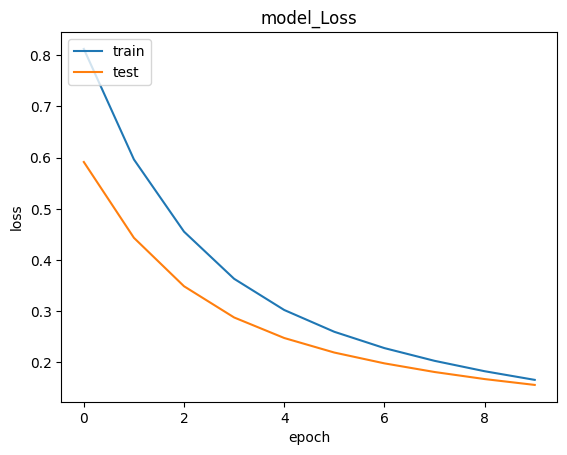

In [80]:
# visualizing the accuracy and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [81]:
# Accuracy of the model on test data
loss,accuracy=model.evaluate(X_test,Y_test)
print('Loss:',loss,'Accuracy:',accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1818 
Loss: 0.1818372756242752 Accuracy: 0.9473684430122375


In [82]:
# prediction probabilities
predictions=model.predict(X_test)
print(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.41718373e-01 2.35135108e-01]
 [3.75546724e-01 4.76273537e-01]
 [8.24255943e-02 9.37753737e-01]
 [8.04375112e-01 2.51811707e-05]
 [3.18099499e-01 3.92075896e-01]
 [7.80247331e-01 2.64832494e-03]
 [1.63920388e-01 4.18590635e-01]
 [1.59151182e-01 8.98066223e-01]
 [1.70929804e-01 8.44892621e-01]
 [1.65969536e-01 7.97196507e-01]
 [4.47879463e-01 7.21767068e-01]
 [3.17820877e-01 9.26259756e-01]
 [6.52266294e-02 3.41755837e-01]
 [2.97433376e-01 7.56852984e-01]
 [1.10454552e-01 8.31333995e-01]
 [2.09666178e-01 8.30641296e-03]
 [1.67807296e-01 8.87971759e-01]
 [1.04185663e-01 4.83436137e-01]
 [3.25562172e-02 4.76401746e-01]
 [8.05628657e-01 4.26546019e-03]
 [3.98594141e-02 4.24976135e-03]
 [1.49801344e-01 8.37261200e-01]
 [2.50500172e-01 8.45741212e-01]
 [1.12775557e-01 8.87954354e-01]
 [1.94485992e-01 5.32661617e-01]
 [7.61865973e-01 3.26760486e-02]
 [3.35276067e-01 7.60486662e-01]
 [4.01682109e-01 5.84068418e-01]
 [6.72720373e-01 1.69641916e-02]
 [6.8

In [83]:
# converting the prediction probabilities to class labels
y_pred=np.argmax(predictions,axis=1)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 1 0]


In [84]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [85]:
Y_pred_labels = [np.argmax(i) for i in predictions]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [86]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.1828909 0.8894464]]
[1]
The tumor is Benign


e:\Anaconda\envs\tfgpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
